# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.linear_model import LinearRegression


# Notebook Presentation

In [126]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [127]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

In [128]:
data.isna().sum()

data = data.dropna()

### Data Type Conversions

In [129]:
data[['USD_Domestic_Gross','USD_Production_Budget','USD_Worldwide_Gross']]=(
    data[['USD_Domestic_Gross','USD_Production_Budget','USD_Worldwide_Gross']].
    replace('[$,]','',regex=True).astype(int))

data[:5]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [130]:
data.Release_Date = pd.to_datetime(data.Release_Date)

data[:5]


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Descriptive Statistics

In [131]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


# Investigating the Zero Revenue Films

In [132]:
data[data.USD_Domestic_Gross==0].nunique() # 511

data[data.USD_Worldwide_Gross==0].sort_values('USD_Production_Budget',ascending=False).head() # Singularity

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


In [133]:
print(f'$0 worldwide-->{len(data[data.USD_Worldwide_Gross==0])}')

data[data.USD_Worldwide_Gross==0].sort_values('USD_Production_Budget',ascending=False).head()

$0 worldwide-->357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0


### Filtering on Multiple Conditions

In [134]:
international_releases = data.query('USD_Worldwide_Gross!=0 and USD_Domestic_Gross==0')
print(f'Number of films made worldwide revenue not domestic-->{len(international_releases)}')


Number of films made worldwide revenue not domestic-->155


### Unreleased Films

In [135]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [136]:
latest_releases = data[data.Release_Date>=scrape_date]
print(f'The Identify which films were not released yet as of the '
      f'time of data collection (May 1st, 2018): {len(latest_releases)}')

The Identify which films were not released yet as of the time of data collection (May 1st, 2018): 7


In [137]:
data_clean = data.drop(latest_releases.index)
data_clean.sort_values('Release_Date',ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5383,2521,2017-12-31,The Thousand Miles,20000000,0,0
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
...,...,...,...,...,...,...
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
1,5140,1916-05-09,Intolerance,385907,0,0


### Films that Lost Money


In [138]:
print(f'What is the percentage of films where the production costs exceeded the worldwide gross revenue?'
      f"{(len(data_clean.query('USD_Production_Budget>USD_Worldwide_Gross'))/len(data.Movie_Title))*100}")



What is the percentage of films where the production costs exceeded the worldwide gross revenue?37.228714524207014


# Seaborn for Data Viz: Bubble Charts

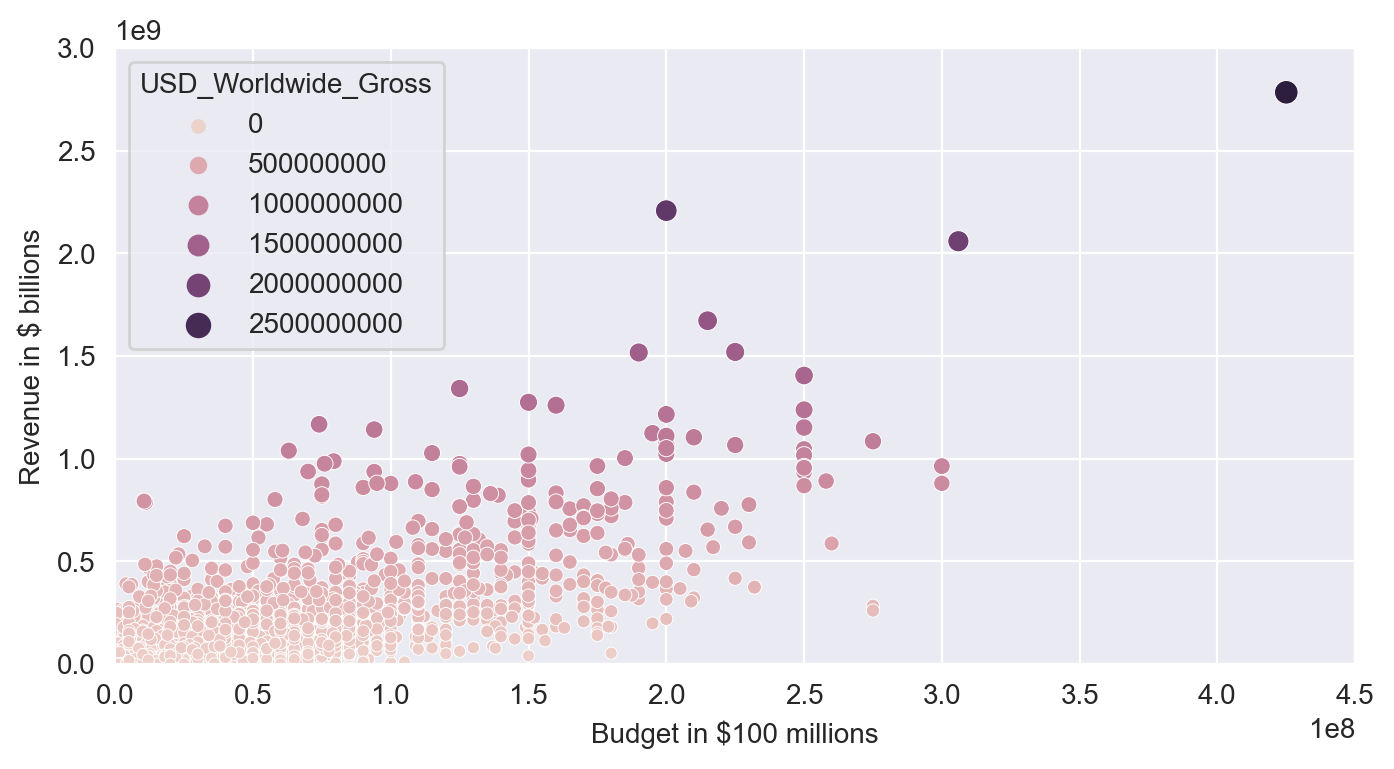

In [139]:
ax = plt.figure(figsize=(8,4), dpi=200)

with sea.axes_style('darkgrid'):
    ax = sea.scatterplot(data=data_clean,
                    x='USD_Production_Budget',
                    y='USD_Worldwide_Gross',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross')

    ax.set(ylim=(0, 3000000000),
           xlim=(0, 450000000),
           ylabel='Revenue in $ billions',
           xlabel='Budget in $100 millions')
 
plt.show()

### Plotting Movie Releases over Time



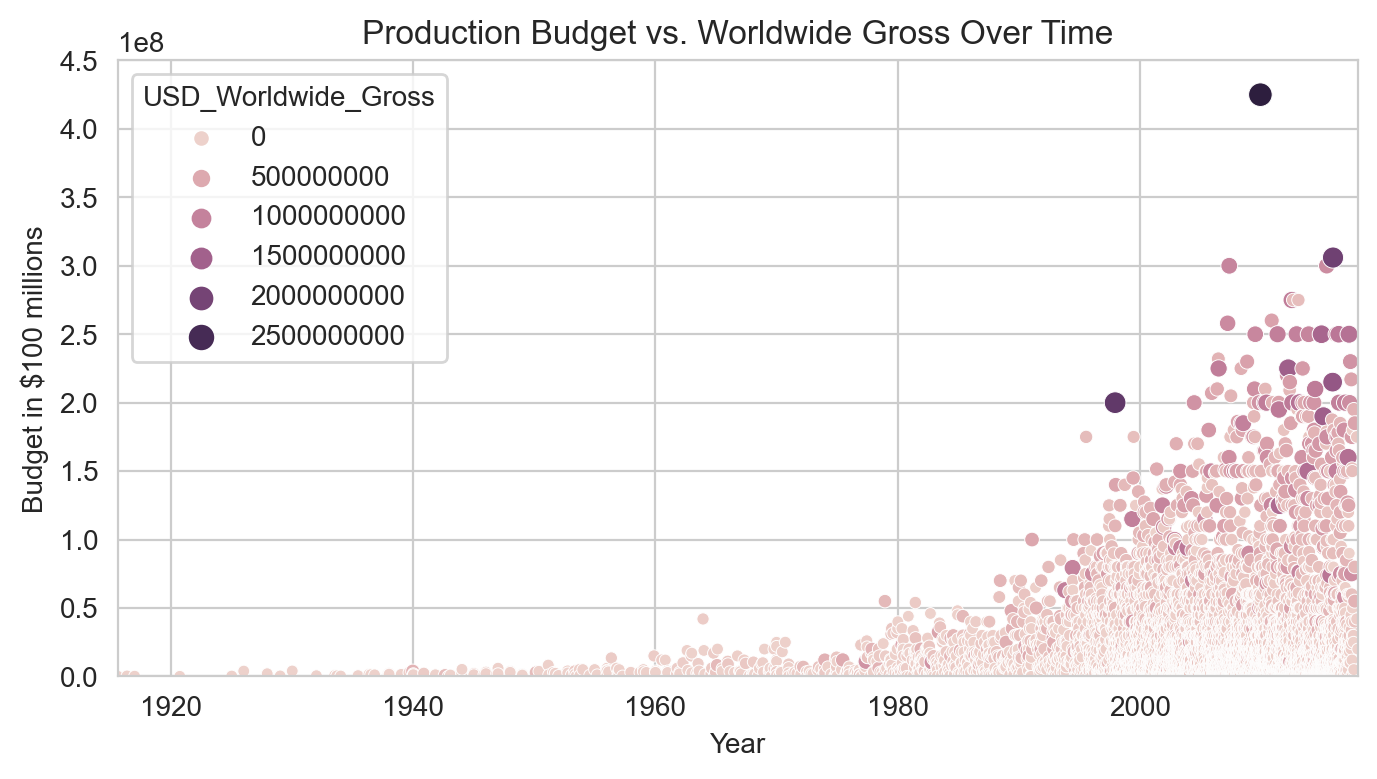

In [140]:
plt.figure(figsize=(8,4),dpi=200)


with sea.axes_style('whitegrid'):
    ax = sea.scatterplot(data=data_clean,
                         x='Release_Date',
                         y='USD_Production_Budget',
                         hue='USD_Worldwide_Gross',
                         size='USD_Worldwide_Gross')
    ax.set_xlim(data_clean.Release_Date.min(), data_clean.Release_Date.max())
    ax.set_ylim(0, 450000000)
    ax.set_xlabel('Year')
    ax.set_ylabel('Budget in $100 millions')
    ax.set_title('Production Budget vs. Worldwide Gross Over Time')
plt.show()

# Converting Years to Decades Trick


In [141]:
data_clean['Decade'] = (data_clean['Release_Date'].dt.year//10)*10


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

In [142]:
old_films = data_clean.query('Decade<=1960')
new_films = data_clean.query('Decade>1960')

expen_old = old_films.USD_Production_Budget.idxmax()

print(f'Number of old films released before 1970s: {len(old_films)}')
print(f"Expensive old films: {old_films['Movie_Title'][expen_old]}")

Number of old films released before 1970s: 153
Expensive old films: Cleopatra


# Seaborn Regression Plots



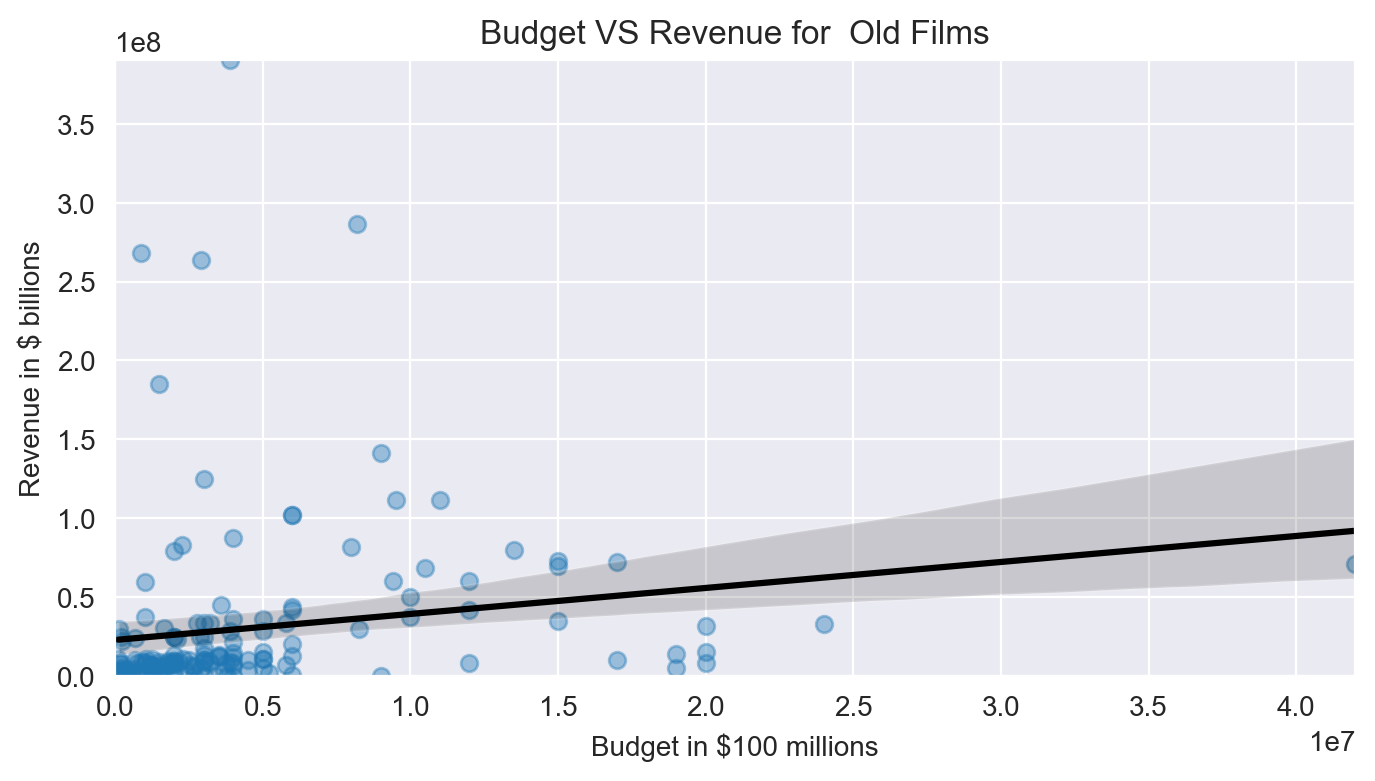

In [143]:
plt.figure(figsize=(8,4), dpi=200)
with sea.axes_style("darkgrid"):
  ax = sea.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
  ax.set_title('Budget VS Revenue for  Old Films')
  ax.set(ylim=(0, old_films.USD_Worldwide_Gross.max()),
       xlim=(0, old_films.USD_Production_Budget.max()),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

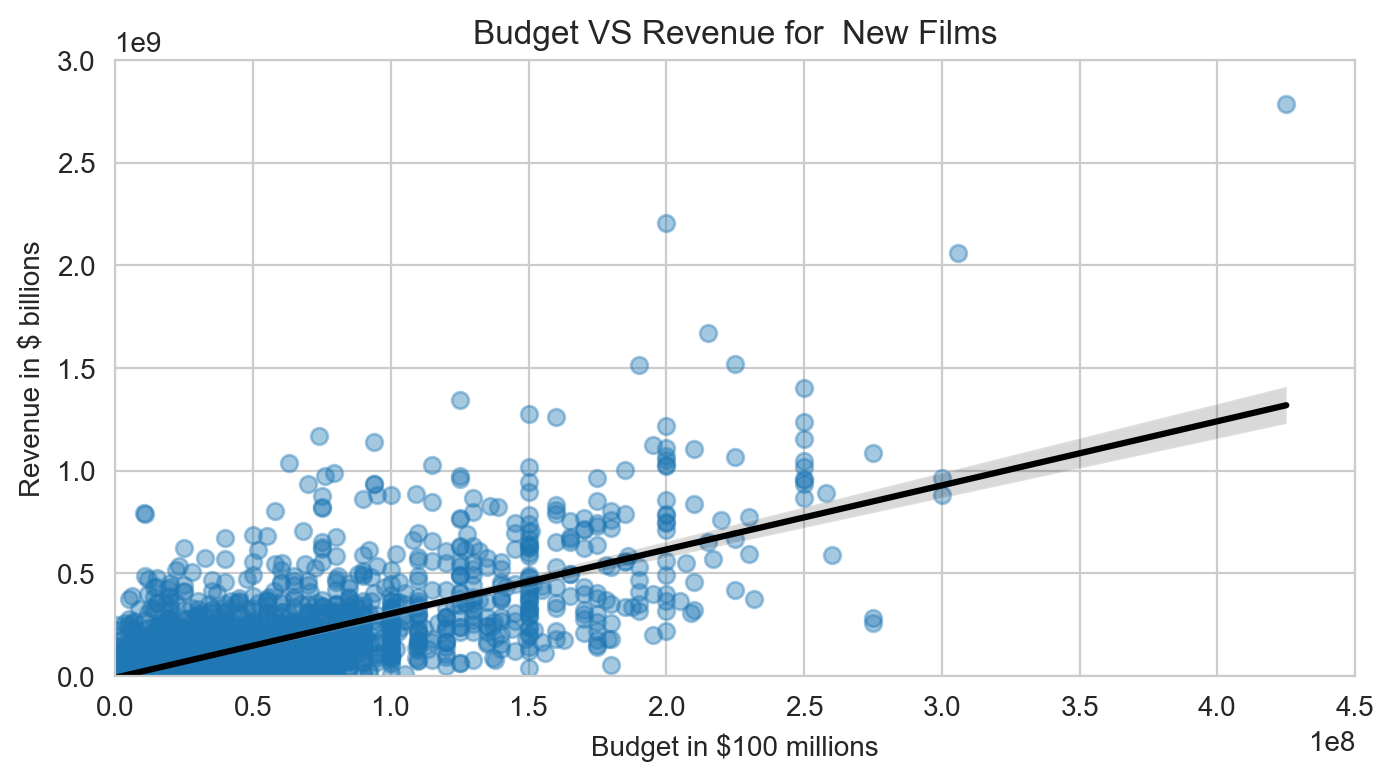

In [144]:
plt.figure(figsize=(8,4), dpi=200)
with sea.axes_style("whitegrid"):
  ax = sea.regplot(data=new_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
  ax.set_title('Budget VS Revenue for  New Films')
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')
plt.show()

# Run Your Own Regression with scikit-learn


$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$


* The `theta_0` gives the y-intercept which tells how much revenue a movie makes when the budget is zero.
* The `theta_1` is the coefficient of the slope which tells how much revenue is made for every zero increase in the budget.

### New Films

In [145]:
regression = LinearRegression()

# Explanatory Variable(s) or Feature(s) --> Which we manipulate 
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])
 
# Response Variable or Target --> to achieve this
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross']) 

In [146]:
regression.fit(X,y)
regression.intercept_

array([-8650768.00661096])

In [147]:
regression.coef_

array([[3.12259592]])

In [148]:
# Root-Mean-Square
regression.score(X,y)
print(f'The model explains about {round(regression.score(X,y)*100)}%')

The model explains about 56%


### Old Films

In [149]:
X_1 = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y_1 = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])


regression = LinearRegression()
regression.fit(X_1, y_1)

print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)

Coefficients: [[1.64771314]]
Intercept: [22821538.63508039]


In [150]:
round(regression.score(X_1,y_1)*100)

3

In [120]:
budget = 350000000
gross_estimate = round(regression.intercept_[0] + regression.coef_[0,0]*budget,-6)

In [124]:
print(f'The estimated revenue for the buget $350M is around : {gross_estimate:.10}')

The estimated revenue for the buget $350M is around : 600000000.0
